# Transformaciones en imágenes en Escala de Grises

El propósito de estas transformaciones es realizar una mejora en la imagen, desde un punto de vista humano.

Se tienen dos objetivos:

1) Mejorar la calidad de una imagen, desde el punto de vista humano.

2) Modificar una imagen para el desarrollo de cierto tipo de análisis.

¿En qué consiste el proceso?

![title](media/proceso-escala-grises.jpg)

Las transformaciones que serán vistas modificarán el valor de los pixeles, no su posición.

## Transformación puntual de una imagen en escala de grises

Sea $A$ una imagen de tamaño $mxn$. Vamos a obtener otra imagen $B$ del mismo tamaño:

\begin{gather*}
B(x, y) = T(A(x, y))
\end{gather*}

En general, la transformación será escrita de la siguiente manera:

\begin{gather*}
s = T(r) \\
r = A(x, y) \\
s = B(x, y) \\
\end{gather*}

## Tipos de transformación

### Lineal

\begin{gather*}
T(r) = c \cdot r + b \\
\end{gather*}

c: constante de la imagen; 
b: brillo de la imagen

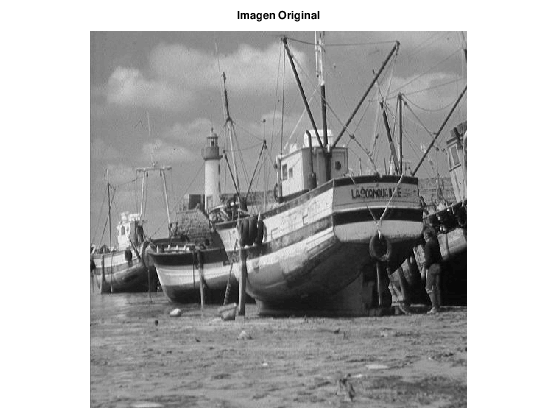

In [1]:
A = imread('media/boat.jpg');

imshow(A);
title('Imagen Original');

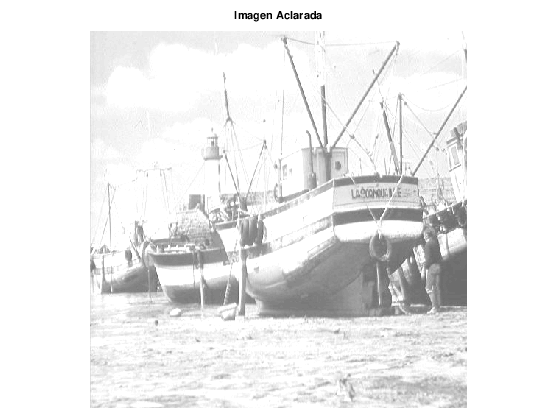

In [2]:
% Aclarar la imagen
c = 1; b = 100;
B = c * A + b;

imshow(B);
title('Imagen Aclarada');

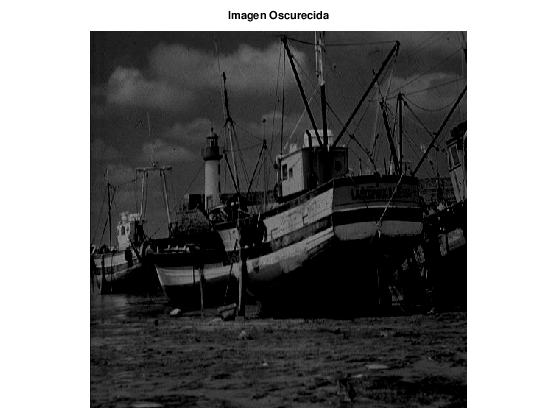

In [3]:
% Oscurecer la imagen
c = 1; b = -100;
C = c * A + b;

imshow(C);
title('Imagen Oscurecida');

### Transformación de autocontraste

\begin{gather*}
T_{ac}(r) = \frac{L - 1}{r_{máx} - r_{mín}} \cdot (r - r_{mín}) \\
T_{ac}(r) = \underbrace{\frac{L - 1}{r_{máx} - r_{mín}}}_{c_{ac}} \cdot r - \underbrace{\frac{r_{mín} \cdot (L - 1)}{r_{máx} - r_{mín}}}_{b_{ac}} \\
T_{ac}(r) = c_{ac} \cdot r - b_{ac}
\end{gather*}

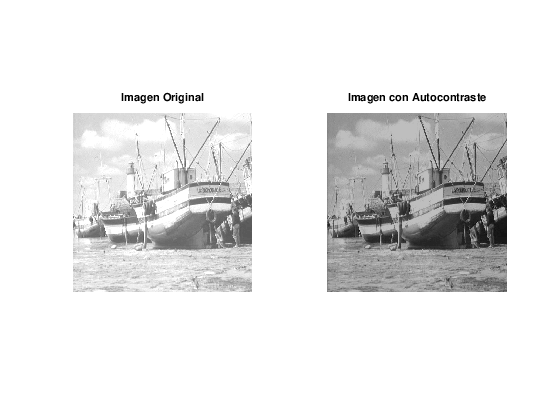

In [4]:
A = imread('media/boat_new.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

L = 255;
rmax = max(max(A));
rmin = min(min(A));
B = (L - 1) / (rmax - rmin) * (A - rmin);
subplot(1, 2, 2);
imshow(B);
title('Imagen con Autocontraste');

### Negativo

Sea $A \in {\rm I\!R}^{mxn}$ la representación en formato "double" de una imagen. El negativo de la imagen A es la matriz $B \in {\rm I\!R}^{mxn}$, tal que

\begin{gather*}
B_{i,j} = -A_{i,j} + 1
\end{gather*}

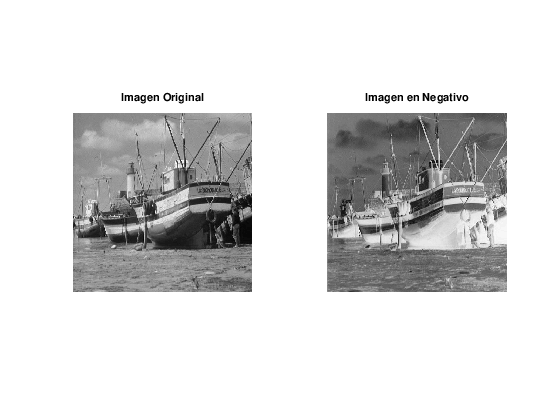

In [5]:
A = imread('media/boat.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

% negativo
subplot(1, 2, 2);
A = im2double(A);
imshow(-A + 1);
title('Imagen en Negativo');

### Transformación Exponencial

\begin{gather*}
T(r) = c \cdot r^\alpha
\end{gather*}

donde $c$ y $\alpha$ son constantes. c: parámetro escalar; $\alpha > 0$: tipo de brillo.

Si $\alpha > 0$, entonces la imagen original se aclara. Si $\alpha < 0$, entonces la imagen se oscurece.

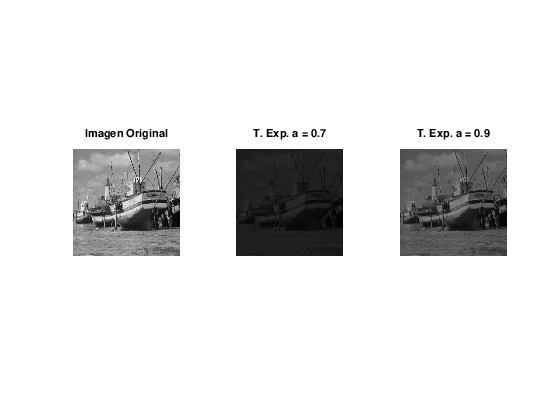

In [6]:
A = imread('media/boat.jpg');
subplot(1, 3, 1);
imshow(A);
title('Imagen Original');

c = 1;

a = 0.7;
B = c * power(A, a); 
subplot(1, 3, 2);
imshow(B);
title(['T. Exp. a = ' num2str(a)]);

a = 0.9;
B = c * power(A, a); 
subplot(1, 3, 3);
imshow(B);
title(['T. Exp. a = ' num2str(a)]);

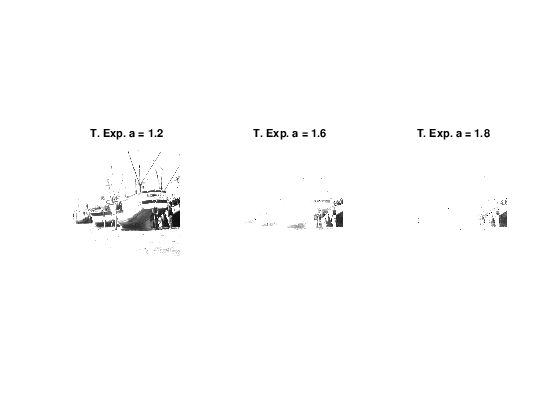

In [7]:
a = 1.2;
B = c * power(A, a); 
subplot(1, 3, 1);
imshow(B);
title(['T. Exp. a = ' num2str(a)]);

a = 1.6;
B = c * power(A, a); 
subplot(1, 3, 2);
imshow(B);
title(['T. Exp. a = ' num2str(a)]);

a = 1.8;
B = c * power(A, a); 
subplot(1, 3, 3);
imshow(B);
title(['T. Exp. a = ' num2str(a)]);

### Transformada Logarítmica

\begin{gather*}
T(r) = c \cdot ln(1 + r)
\end{gather*}

### Transformada por partes

![title](media/porpartesr.PNG)

\begin{gather*}
A_1 \cup A_2 \cup \ldots \cup A_n = \{0, 1, \ldots, 255\}
\end{gather*}

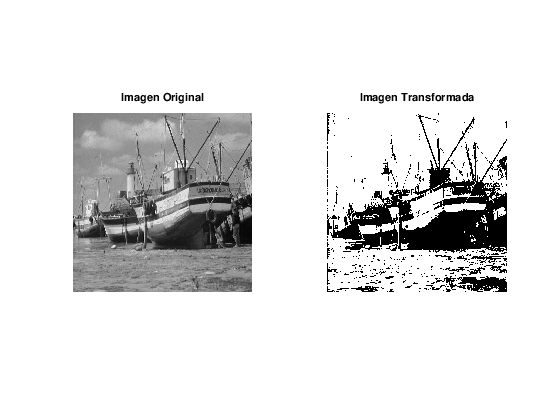

In [8]:
A = imread('media/boat.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

[m, n, r] = size(A);
B = zeros(m, n, r);

% Si r >= 127 el pixel toma un valor de 255
% Si r < 127 el pixel toma un valor de 0
for i = 1:m
  for j = 1:n
    pixel = A(i, j, :);
    if pixel >= 127 
      B(i, j, :) = 255;
    else 
      B(i, j, :) = 0;
    endif
  endfor
endfor  

subplot(1, 2, 2);
imshow(B);
title('Imagen Transformada');